<a href="https://colab.research.google.com/github/Rojakarilakshmiprasanna/SCT_ML/blob/main/SCT_ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   square_feet  10 non-null     int64
 1   bedrooms     10 non-null     int64
 2   bathrooms    10 non-null     int64
 3   price        10 non-null     int64
dtypes: int64(4)
memory usage: 452.0 bytes
None

Summary Statistics:
       square_feet   bedrooms  bathrooms          price
count      10.0000  10.000000  10.000000      10.000000
mean     2070.0000   3.800000   2.700000  439000.000000
std       359.1657   0.788811   0.823273  108571.532999
min      1500.0000   3.000000   2.000000  300000.000000
25%      1825.0000   3.000000   2.000000  362500.000000
50%      2050.0000   4.000000   2.500000  410000.000000
75%      2350.0000   4.000000   3.000000  495000.000000
max      2600.0000   5.000000   4.000000  620000.000000

Missing Values:
square_feet    0
bedrooms       0
bathrooms      0
pric

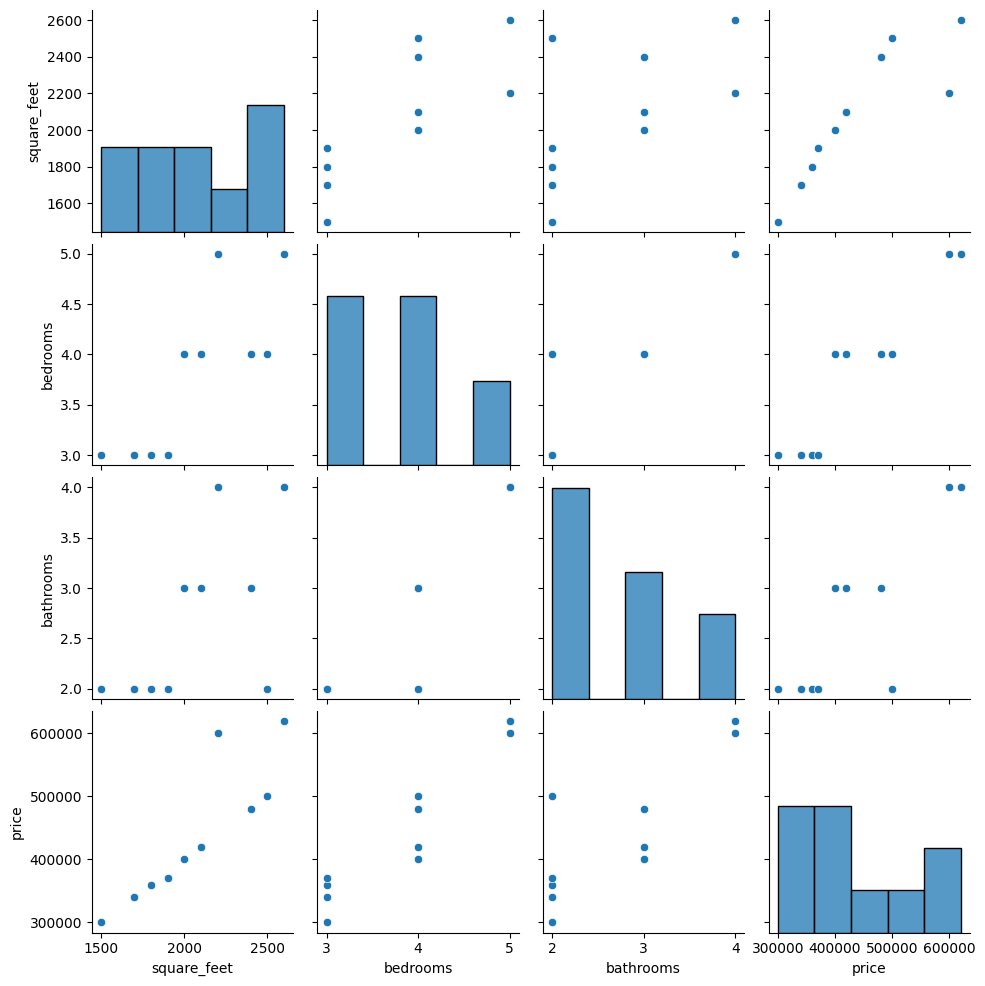

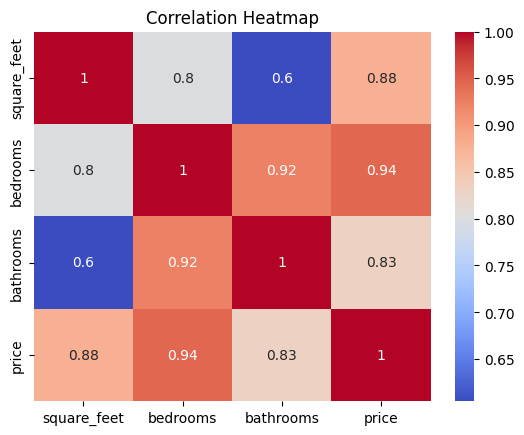


Model Performance:
Mean Squared Error: 1853625273.9225745
R² Score: 0.4851040905770626


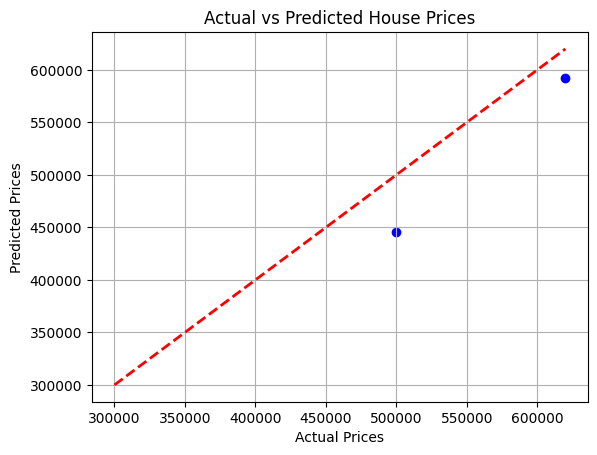


Predicted Price for 2400 sq ft, 3 bed, 2 bath: $391,324.32


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [3]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Create a sample dataset (or upload your own CSV)
# Uncomment these lines if you want to upload your file:
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv('your_file.csv')  # Replace with your filename

# Sample dataset for testing
data = {
    'square_feet': [1500, 2000, 2500, 1800, 2200, 1700, 2400, 2100, 2600, 1900],
    'bedrooms':     [3, 4, 4, 3, 5, 3, 4, 4, 5, 3],
    'bathrooms':    [2, 3, 2, 2, 4, 2, 3, 3, 4, 2],
    'price':        [300000, 400000, 500000, 360000, 600000, 340000, 480000, 420000, 620000, 370000]
}
df = pd.DataFrame(data)

# Step 3: Explore the dataset
print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

# Step 4: Visualize relationships
sns.pairplot(df)
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Step 5: Prepare features and labels
X = df[['square_feet', 'bedrooms', 'bathrooms']]
y = df['price']

# Step 6: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Step 7: Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Predict and evaluate
y_pred = model.predict(X_test)

print("\nModel Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Step 9: Plot actual vs predicted
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

# Step 10: Predict new house price
new_house = [[2400, 3, 2]]  # square_feet, bedrooms, bathrooms
predicted_price = model.predict(new_house)
print(f"\nPredicted Price for 2400 sq ft, 3 bed, 2 bath: ${predicted_price[0]:,.2f}")
